# Hypothesis testing

Table of contents
- [independent sample t-test](#samplet)

In [6]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

<a id="samplet"></a>
## independent sample t-test  
Comparison of the mean of two samples.  

**from scratch**:   
Calculation of the t-statistics with $2(N-1)$ degrees of freedom:
$$
t = \frac{M_x - M_y}{\sqrt{\frac{S_x^2}{n_x} + \frac{S_y^2}{n_y}}}
$$
with
$$
S^2=\frac{\sum (x - \mu)}{n-1}
$$


In [7]:
#create normally distributed data with same standard deviation
N = 100
mu_a = 3
sigma_a=4
data_a = np.random.normal(loc=mu_a, scale=sigma_a, size=100)
#create data b 
mu_b = 5
sigma_b = 4
data_b = np.random.normal(loc=mu_b, scale=sigma_b, size=100)

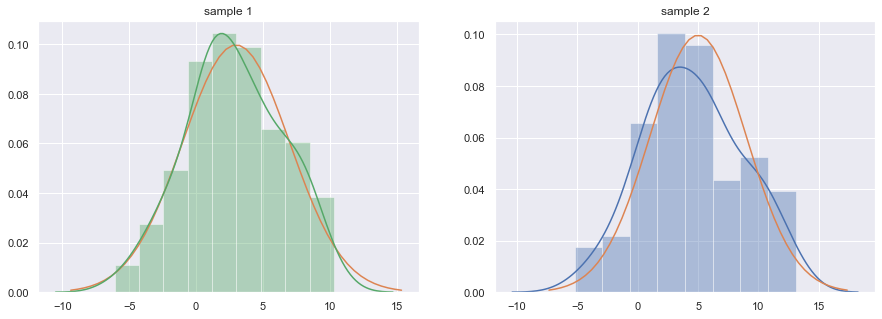

In [10]:
#Visualization
fig, ax = plt.subplots(1, 2, figsize=[15,5])
sns.distplot(data_b, ax=ax[1])
range_a = np.linspace(stats.norm.ppf(0.001, mu_a, sigma_a), stats.norm.ppf(0.999, mu_a, sigma_a))
range_b = np.linspace(stats.norm.ppf(0.001, mu_b, sigma_b), stats.norm.ppf(0.999, mu_b, sigma_b))
ax[1].plot(range_b, stats.norm.pdf(range_b, loc=mu_b, scale=sigma_b))
ax[0].plot(range_a, stats.norm.pdf(range_a, loc=mu_a, scale=sigma_a), color='C1')
ax[0].set_title("sample 1")
ax[1].set_title("sample 2")
sns.distplot(data_a, ax=ax[0], color='C2' )

In [25]:
#calculate t-statistics

#from scratch
var1 = np.var(data_a, ddof=1)
var2 = np.var(data_b, ddof=1)
mean1 = np.mean(data_a)
mean2 = np.mean(data_b)
t = (mean1 - mean2)/(np.sqrt(var1/N + var2/N))
pval =stats.t.cdf(t, df=2*N-2) * 2
print("t: {}, pvalue: {}".format(t, pval))

t: -3.0835065692909414, pvalue: 0.0023377238831705323


In [18]:
#calculate with scipy stats
stats.ttest_ind(data_a,data_b)

Ttest_indResult(statistic=-3.0835065692909414, pvalue=0.0023377238831705323)